In [1]:
# Importing necessary librarys 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Setting up the formatting parameters
pd.set_option('display.max_columns',500) # To display max columns
pd.set_option('display.max_row',15000) # To display max rows
pd.options.display.float_format = "{:,.2f}".format #format floating-point number

In [3]:
df_raw = pd.read_csv('singapore_house_resale_price.csv')

In [4]:
df_raw.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price
0,2017-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,10 TO 12,44.00,Improved,1979,61 years 04 months,"232,000.00"
1,2017-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,01 TO 03,67.00,New Generation,1978,60 years 07 months,"250,000.00"
2,2017-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,01 TO 03,67.00,New Generation,1980,62 years 05 months,"262,000.00"
3,2017-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,04 TO 06,68.00,New Generation,1980,62 years 01 month,"265,000.00"
4,2017-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,01 TO 03,67.00,New Generation,1980,62 years 05 months,"265,000.00"


In [5]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165041 entries, 0 to 165040
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   month                165041 non-null  object 
 1   town                 165041 non-null  object 
 2   flat_type            165041 non-null  object 
 3   block                165041 non-null  object 
 4   street_name          165041 non-null  object 
 5   storey_range         165041 non-null  object 
 6   floor_area_sqm       165041 non-null  float64
 7   flat_model           165041 non-null  object 
 8   lease_commence_date  165041 non-null  int64  
 9   remaining_lease      165041 non-null  object 
 10  resale_price         165041 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 13.9+ MB


# EDA

In [6]:
house = df_raw.copy()

In [7]:
house.nunique()

month                    82
town                     26
flat_type                 7
block                  2686
street_name             565
storey_range             17
floor_area_sqm          170
flat_model               21
lease_commence_date      56
remaining_lease         668
resale_price           3629
dtype: int64

In [8]:
#Checking for duplicate records
print('There are ',house.duplicated().sum(),' duplicate records, are droped.')
house = house.drop_duplicates()
print('Dataset with ', house.shape[0] ,'were used for analysis')

There are  278  duplicate records, are droped.
Dataset with  164763 were used for analysis


In [9]:
# Checking for null values 
house.isnull().sum()

month                  0
town                   0
flat_type              0
block                  0
street_name            0
storey_range           0
floor_area_sqm         0
flat_model             0
lease_commence_date    0
remaining_lease        0
resale_price           0
dtype: int64

## Data Cleaning

In [10]:
# cleaning month 
house['month'][0]

'2017-01'

In [11]:
#converting feature to datetime format 
house['month'] = pd.to_datetime(house['month'])

In [12]:
house['month'][0]

Timestamp('2017-01-01 00:00:00')

In [13]:
house['flat_type'].value_counts()

flat_type
4 ROOM              69307
5 ROOM              41284
3 ROOM              38859
EXECUTIVE           12432
2 ROOM               2746
MULTI-GENERATION       73
1 ROOM                 62
Name: count, dtype: int64

In [14]:
house['flat_model'].value_counts()

flat_model
Model A                   56524
Improved                  40750
New Generation            20561
Premium Apartment         18809
Simplified                 6398
Apartment                  6233
Maisonette                 4728
Standard                   4588
DBSS                       2859
Model A2                   1894
Adjoined flat               298
Model A-Maisonette          297
Type S1                     288
Type S2                     155
Premium Apartment Loft       97
Terrace                      91
Multi Generation             73
2-room                       60
Improved-Maisonette          25
3Gen                         21
Premium Maisonette           14
Name: count, dtype: int64

In [15]:
house['storey_range'].value_counts()

storey_range
04 TO 06    37840
07 TO 09    34565
10 TO 12    30838
01 TO 03    29047
13 TO 15    15750
16 TO 18     7431
19 TO 21     3164
22 TO 24     2285
25 TO 27     1373
28 TO 30      890
31 TO 33      471
34 TO 36      432
37 TO 39      383
40 TO 42      186
43 TO 45       55
46 TO 48       38
49 TO 51       15
Name: count, dtype: int64

In [16]:
house = house.reset_index(drop=True)

In [17]:
# cleaning storey_range
for i in range(0,len(house['storey_range']),1):
    if (house['storey_range'][i] == '01 TO 03') or (house['storey_range'][i] == '04 TO 06'):
        house['storey_range'][i] = 'Low_Rise_Building'
    elif house['storey_range'][i] in ('07 TO 09','10 TO 12','13 TO 15'):
        house['storey_range'][i] = 'Mid_Rise_Building'
    else:
        house['storey_range'][i] = 'High_Rise_Building'

house['storey_range'].value_counts()

storey_range
Mid_Rise_Building     81153
Low_Rise_Building     66887
High_Rise_Building    16723
Name: count, dtype: int64

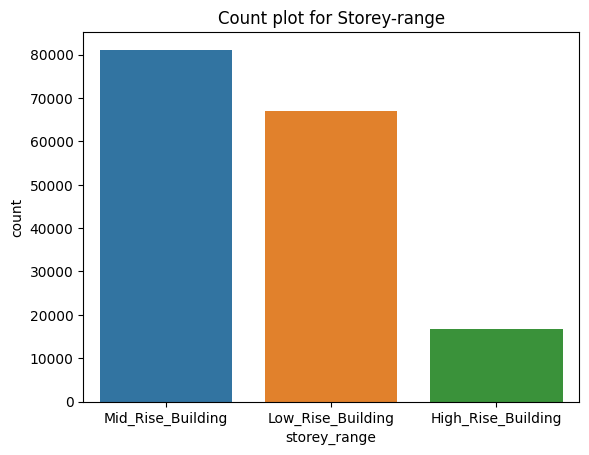

In [18]:
# Count plot for storey range 
sns.countplot(data=house,x='storey_range')
plt.title('Count plot for Storey-range')
plt.show()

In [19]:
house['flat_model'].value_counts()

flat_model
Model A                   56524
Improved                  40750
New Generation            20561
Premium Apartment         18809
Simplified                 6398
Apartment                  6233
Maisonette                 4728
Standard                   4588
DBSS                       2859
Model A2                   1894
Adjoined flat               298
Model A-Maisonette          297
Type S1                     288
Type S2                     155
Premium Apartment Loft       97
Terrace                      91
Multi Generation             73
2-room                       60
Improved-Maisonette          25
3Gen                         21
Premium Maisonette           14
Name: count, dtype: int64

In [20]:
house.describe().T

,count,mean,min,25%,50%,75%,max,std
month,164763,2020-08-04 11:09:14.607526912,2017-01-01 00:00:00,2018-12-01 00:00:00,2020-10-01 00:00:00,2022-04-01 00:00:00,2023-10-01 00:00:00,NaN
floor_area_sqm,"164,763.00",97.34,31.00,82.00,93.00,112.00,249.00,24.03
lease_commence_date,"164,763.00","1,995.80","1,966.00","1,985.00","1,996.00","2,009.00","2,022.00",13.90
resale_price,"164,763.00","488,792.76","140,000.00","365,000.00","458,800.00","580,000.00","1,500,000.00","169,194.71"


In [21]:
#house['lease_commence_date'].value_counts()
house['lease_commence_date'].unique()

array([1979, 1978, 1980, 1981, 1976, 1977, 2011, 2012, 1996, 1988, 1985,
       1986, 1974, 1984, 1983, 1987, 1982, 2000, 2001, 2005, 1989, 2010,
       1972, 1993, 1973, 1992, 1990, 1998, 2004, 1997, 1971, 1975, 1970,
       1969, 2013, 2008, 1999, 2003, 2002, 1995, 2006, 1967, 1968, 2007,
       1991, 1966, 2009, 1994, 2014, 2015, 2016, 2017, 2018, 2019, 2022,
       2020], dtype=int64)

In [22]:
# inserting new column 
house.insert(11,'building_Age','')

In [23]:
house = house.reset_index(drop=True)

In [24]:
# Calculating the Age of the building 
for i in range(0,len(house['lease_commence_date']),1):
    house['building_Age'][i]= (2023 - house['lease_commence_date'][i])

house['building_Age'].value_counts()


building_Age
38    9711
8     9521
39    7178
35    6110
7     5942
22    5382
26    4989
36    4952
10    4910
20    4744
6     4713
25    4591
24    4520
45    4515
5     4446
37    4421
23    4260
27    4042
34    4023
11    3693
21    3662
30    3650
44    3586
43    3525
9     3502
31    2887
19    2753
28    2682
47    2634
40    2544
42    2485
46    2226
48    2065
12    1927
49    1687
41    1609
18    1454
53    1373
17    1264
33    1130
4     1081
15    1037
50     929
29     928
14     907
56     804
54     785
51     732
13     720
52     714
16     442
55     192
32     165
57      15
3        3
1        1
Name: count, dtype: int64

In [25]:
house.describe().T[['min','max']]

,min,max
month,2017-01-01 00:00:00,2023-10-01 00:00:00
floor_area_sqm,31.00,249.00
lease_commence_date,"1,966.00","2,022.00"
resale_price,"140,000.00","1,500,000.00"


In [26]:
house['building_Age'].dtype

dtype('O')

In [27]:
house['building_Age'] = house['building_Age'].astype(int)
house['building_Age'].dtype

dtype('int32')

In [28]:
age = house['building_Age'].unique().tolist()
age = sorted(age)
print(age)

[1, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57]


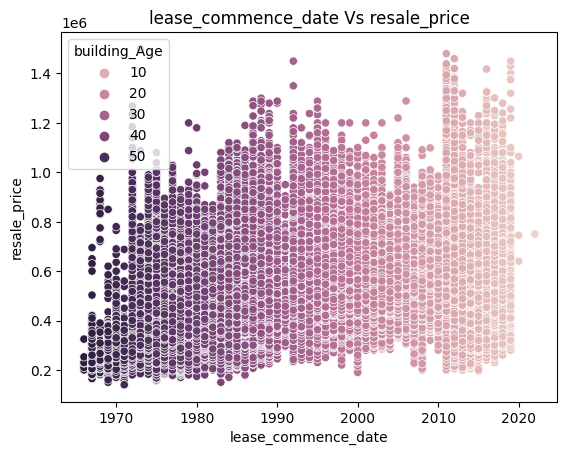

In [29]:
# Scatter Plot
plt.title('lease_commence_date Vs resale_price')
sns.scatterplot(data=house,x='lease_commence_date',y='resale_price',hue='building_Age')
plt.show()

In [30]:
house.groupby(['town','street_name','flat_model']).count()

month  flat_type  \
town            street_name          flat_model                                 
ANG MO KIO      ANG MO KIO AVE 1     Adjoined flat               3          3   
                                     Improved                   41         41   
                                     Model A                   191        191   
                                     New Generation            432        432   
                                     Standard                   30         30   
                ANG MO KIO AVE 10    Adjoined flat              22         22   
                                     Improved                  220        220   
                                     New Generation           1343       1343   
                ANG MO KIO AVE 2     Model A                    20         20   
                ANG MO KIO AVE 3     Adjoined flat              13         13   
                                     Improved                  100        100   
                                     Model A                    17         17   
                                     New Generation           1267       1267   
                                     Standard                   29         29   
                ANG MO KIO AVE 4     Adjoined flat               3          3   
                                     Apartment                  34         34   
                                     Improved                  110        110   
                                     Maisonette                  6          6   
                                     Model A                    48         48   
                                     New Generation            612        612   
                ANG MO KIO AVE 5     Adjoined flat              11         11   
                                     Improved                   91         91   
                                     New Generation            636        636   
                ANG MO KIO AVE 6     Adjoined flat               2          2   
                                     Improved                   69         69   
                                     Model A                    31         31   
                                     New Generation            210        210   
                ANG MO KIO AVE 8     Adjoined flat              11         11   
                                     Improved                   37         37   
                                     New Generation            188        188   
                ANG MO KIO AVE 9     Adjoined flat               3          3   
                                     Improved                   27         27   
                                     Model A                     3          3   
                                     New Generation             51         51   
                ANG MO KIO ST 11     Apartment                   8          8   
                                     Improved                   13         13   
                                     Maisonette                  4          4   
                                     Model A                     1          1   
                ANG MO KIO ST 21     Improved                   22         22   
                                     Model A                    51         51   
                ANG MO KIO ST 31     Improved                   57         57   
                                     Model A                    60         60   
                ANG MO KIO ST 32     Improved                   59         59   
                                     Model A                    62         62   
                ANG MO KIO ST 44     Improved                   38         38   
                                     Model A                    69         69   
                ANG MO KIO ST 51     Model A                    71         71   
                ANG MO KIO ST 52     DBSS                      248        248   
           

In [31]:
house.groupby(['town','street_name'])['resale_price'].count()

town             street_name         
ANG MO KIO       ANG MO KIO AVE 1         697
                 ANG MO KIO AVE 10       1585
                 ANG MO KIO AVE 2          20
                 ANG MO KIO AVE 3        1426
                 ANG MO KIO AVE 4         813
                 ANG MO KIO AVE 5         738
                 ANG MO KIO AVE 6         312
                 ANG MO KIO AVE 8         236
                 ANG MO KIO AVE 9          84
                 ANG MO KIO ST 11          26
                 ANG MO KIO ST 21          73
                 ANG MO KIO ST 31         117
                 ANG MO KIO ST 32         121
                 ANG MO KIO ST 44         107
                 ANG MO KIO ST 51          71
                 ANG MO KIO ST 52         366
                 ANG MO KIO ST 61          36
BEDOK            BEDOK CTRL               166
                 BEDOK NTH AVE 1          261
                 BEDOK NTH AVE 2          275
                 BEDOK NTH AVE 3          

In [32]:
house.dtypes

month                  datetime64[ns]
town                           object
flat_type                      object
block                          object
street_name                    object
storey_range                   object
floor_area_sqm                float64
flat_model                     object
lease_commence_date             int64
remaining_lease                object
resale_price                  float64
building_Age                    int32
dtype: object

In [33]:
house['block'].value_counts()

block
2       511
8       490
1       467
9       455
101     443
7       419
3       418
108     414
4       408
114     405
110     404
22      396
109     395
107     392
115     390
112     388
113     388
111     387
12      383
6       369
11      367
121     364
20      364
5       360
102     358
13      352
32      347
103     345
23      343
105     337
34      335
116     331
17      330
21      329
28      329
125     328
130     326
122     322
106     309
50      309
120     307
124     304
128     301
119     291
30      285
117     284
18      282
19      282
129     276
55      274
10      263
104     263
54      262
126     260
123     259
57      255
15      254
141     251
145     250
210     248
146     245
421     245
135     245
52      245
142     244
425     243
118     240
51      240
416     239
33      238
131     237
53      235
204     234
411     234
27      230
148     230
16      230
43      229
211     229
420     229
86      228
406     227
157     22

In [34]:
house.head()

,month,town,flat_type,block,street_name,storey_range,floor_area_sqm,flat_model,lease_commence_date,remaining_lease,resale_price,building_Age
0,2017-01-01,ANG MO KIO,2 ROOM,406,ANG MO KIO AVE 10,Mid_Rise_Building,44.00,Improved,1979,61 years 04 months,"232,000.00",44
1,2017-01-01,ANG MO KIO,3 ROOM,108,ANG MO KIO AVE 4,Low_Rise_Building,67.00,New Generation,1978,60 years 07 months,"250,000.00",45
2,2017-01-01,ANG MO KIO,3 ROOM,602,ANG MO KIO AVE 5,Low_Rise_Building,67.00,New Generation,1980,62 years 05 months,"262,000.00",43
3,2017-01-01,ANG MO KIO,3 ROOM,465,ANG MO KIO AVE 10,Low_Rise_Building,68.00,New Generation,1980,62 years 01 month,"265,000.00",43
4,2017-01-01,ANG MO KIO,3 ROOM,601,ANG MO KIO AVE 5,Low_Rise_Building,67.00,New Generation,1980,62 years 05 months,"265,000.00",43


In [35]:
# Changing the column names
house = house.rename(columns={'building_Age':'flat_age_months'})

In [36]:
# Converting Years to months
for i in range(0,len(house['flat_age_months']),1):
    house['flat_age_months'][i] = (house['flat_age_months'][i]*12)
print(house['flat_age_months'][0])

528


In [37]:
for i in range(0,len(house['remaining_lease']),1):
    year = (house['remaining_lease'][i][:2])
    month = (house['remaining_lease'][i][9:11])
    if month != '':
        house['remaining_lease'][i] = (int(month) + (int(year)*12))
    else:
        year = (house['remaining_lease'][i][:2])
        house['remaining_lease'][i] = (int(year)*12)
        
print(house['remaining_lease'][0])

736


In [38]:
house['remaining_lease'] = house['remaining_lease'].astype(int)

In [39]:
# Drop month column
house.drop(['month','lease_commence_date','block','street_name'],axis=1,inplace=True)

In [40]:
house.head(2)

,town,flat_type,storey_range,floor_area_sqm,flat_model,remaining_lease,resale_price,flat_age_months
0,ANG MO KIO,2 ROOM,Mid_Rise_Building,44.00,Improved,736,"232,000.00",528
1,ANG MO KIO,3 ROOM,Low_Rise_Building,67.00,New Generation,727,"250,000.00",540


In [41]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164763 entries, 0 to 164762
Data columns (total 8 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   town             164763 non-null  object 
 1   flat_type        164763 non-null  object 
 2   storey_range     164763 non-null  object 
 3   floor_area_sqm   164763 non-null  float64
 4   flat_model       164763 non-null  object 
 5   remaining_lease  164763 non-null  int32  
 6   resale_price     164763 non-null  float64
 7   flat_age_months  164763 non-null  int32  
dtypes: float64(2), int32(2), object(4)
memory usage: 8.8+ MB


In [44]:
# Extracting a new feature lease expiry period in months
house.insert(8,'lease_exp','')

for i in range(0,(len(house['remaining_lease'])),1):
    house['lease_exp'][i] = ((house['remaining_lease'][i]) - (house['flat_age_months'][i]))



In [45]:
house['lease_exp'] = house['lease_exp'].astype(int)

In [47]:
house.drop(['remaining_lease'],axis=1,inplace=True)

In [48]:
house.head()

,town,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,flat_age_months,lease_exp
0,ANG MO KIO,2 ROOM,Mid_Rise_Building,44.00,Improved,"232,000.00",528,208
1,ANG MO KIO,3 ROOM,Low_Rise_Building,67.00,New Generation,"250,000.00",540,187
2,ANG MO KIO,3 ROOM,Low_Rise_Building,67.00,New Generation,"262,000.00",516,233
3,ANG MO KIO,3 ROOM,Low_Rise_Building,68.00,New Generation,"265,000.00",516,229
4,ANG MO KIO,3 ROOM,Low_Rise_Building,67.00,New Generation,"265,000.00",516,233


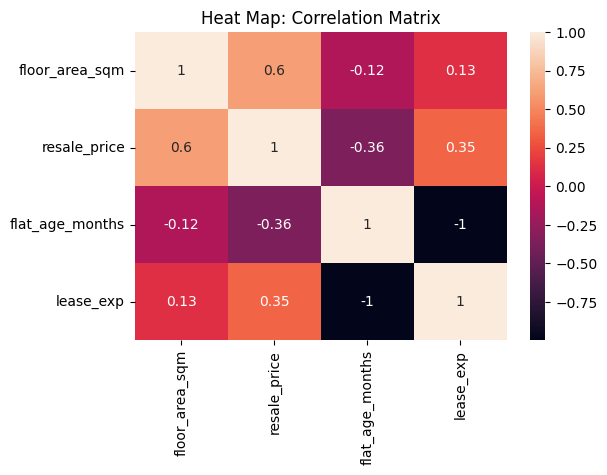

In [49]:
# Calculate the correlation matrix for numeric columns
corr = house.corr(numeric_only=True)

# Plotting correlation heat map
plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True)

plt.title('Heat Map: Correlation Matrix')

plt.show()

In [50]:
house['lease_exp'].dtypes

dtype('int32')

In [51]:
house.to_csv('sing_house_price_cleaned.csv')

# ML Preprocessing

In [52]:
house_ml = pd.read_csv('sing_house_price_cleaned.csv',index_col=0)
house_ml.head()

,town,flat_type,storey_range,floor_area_sqm,flat_model,resale_price,flat_age_months,lease_exp
0,ANG MO KIO,2 ROOM,Mid_Rise_Building,44.00,Improved,"232,000.00",528,208
1,ANG MO KIO,3 ROOM,Low_Rise_Building,67.00,New Generation,"250,000.00",540,187
2,ANG MO KIO,3 ROOM,Low_Rise_Building,67.00,New Generation,"262,000.00",516,233
3,ANG MO KIO,3 ROOM,Low_Rise_Building,68.00,New Generation,"265,000.00",516,229
4,ANG MO KIO,3 ROOM,Low_Rise_Building,67.00,New Generation,"265,000.00",516,233


In [53]:
house_ml.columns

Index(['town', 'flat_type', 'storey_range', 'floor_area_sqm', 'flat_model',
       'resale_price', 'flat_age_months', 'lease_exp'],
      dtype='object')

In [54]:
house_cat = list(house_ml.select_dtypes(include=object))
house_cat

['town', 'flat_type', 'storey_range', 'flat_model']

In [55]:
house_con = list(house_ml.select_dtypes(exclude=object))
house_con

['floor_area_sqm', 'resale_price', 'flat_age_months', 'lease_exp']

In [56]:
cat_encoding = pd.get_dummies(house_ml[house_cat],drop_first=True)

In [57]:
house_encoded = pd.concat([house_ml[house_con], cat_encoding], axis=1)

In [58]:
columns_list = list(house_encoded.columns)

In [59]:
features = list(set(columns_list) - set(['resale_price']))

In [60]:
Y = house_encoded['resale_price'].values
Y

array([232000., 250000., 262000., ..., 753000., 808000., 980000.])

In [61]:
X = (house_encoded[features].values).astype(int)
print(X)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [62]:
# Lazy Predict - Regression

from lazypredict.Supervised import LazyRegressor
from sklearn.utils import shuffle

X = X.astype(np.float32)

offset = int(X.shape[0] * 0.8)

X_train, Y_train = X[:offset], Y[:offset]
X_test, Y_test = X[offset:], Y[offset:]

reg = LazyRegressor(verbose=0, ignore_warnings=True, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, Y_train, Y_test)

print(models)

 98%|█████████████████████████████████████████████████████████████████████████████  | 41/42 [1:34:28<05:36, 336.97s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.011933 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 131810, number of used features: 53
[LightGBM] [Info] Start training from score 469481.517131


100%|███████████████████████████████████████████████████████████████████████████████| 42/42 [1:34:31<00:00, 135.03s/it]


                               Adjusted R-Squared         R-Squared  \
Model                                                                 
RandomForestRegressor                        0.87              0.87   
ExtraTreesRegressor                          0.86              0.87   
BaggingRegressor                             0.86              0.86   
XGBRegressor                                 0.85              0.85   
DecisionTreeRegressor                        0.83              0.83   
ExtraTreeRegressor                           0.82              0.82   
PoissonRegressor                             0.81              0.81   
KNeighborsRegressor                          0.81              0.81   
HistGradientBoostingRegressor                0.76              0.76   
LinearRegression                             0.76              0.76   
TransformedTargetRegressor                   0.76              0.76   
RidgeCV                                      0.76              0.76   
Bayesi

98%|█████████████████████████████████████████████████████████████████████████████  | 41/42 [2:08:51<07:37, 457.38s/it]
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.015815 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 615
[LightGBM] [Info] Number of data points in the train set: 131810, number of used features: 53
[LightGBM] [Info] Start training from score 469481.517131
100%|███████████████████████████████████████████████████████████████████████████████| 42/42 [2:08:55<00:00, 184.17s/it]
                               Adjusted R-Squared         R-Squared  \
Model                                                                 
RandomForestRegressor                        0.87              0.87   
ExtraTreesRegressor                          0.86              0.86   
BaggingRegressor                             0.86              0.86   
XGBRegressor                                 0.85              0.85   
DecisionTreeRegressor                        0.83              0.83   
PoissonRegressor                             0.81              0.81   
ExtraTreeRegressor                           0.81              0.81   
KNeighborsRegressor                          0.81              0.81   
HistGradientBoostingRegressor                0.76              0.76   
LinearRegression                             0.76              0.76   
TransformedTargetRegressor                   0.76              0.76   
RidgeCV                                      0.76              0.76   
BayesianRidge                                0.76              0.76   
Ridge                                        0.76              0.76   
LGBMRegressor                                0.75              0.76   
Lasso                                        0.75              0.75   
HuberRegressor                               0.73              0.73   
PassiveAggressiveRegressor                   0.70              0.70   
AdaBoostRegressor                            0.64              0.64   
LassoCV                                      0.62              0.62   
LassoLars                                    0.62              0.62   
LassoLarsIC                                  0.62              0.62   
LassoLarsCV                                  0.59              0.59   
MLPRegressor                                 0.57              0.57   
GradientBoostingRegressor                    0.55              0.55   
LarsCV                                       0.51              0.51   
ElasticNet                                   0.40              0.40   
TweedieRegressor                             0.32              0.32   
OrthogonalMatchingPursuit                    0.30              0.30   
OrthogonalMatchingPursuitCV                  0.30              0.30   
GammaRegressor                               0.25              0.25   
ElasticNetCV                                -0.29             -0.28   
DummyRegressor                              -0.32             -0.31   
NuSVR                                       -0.43             -0.42   
SVR                                         -0.54             -0.53   
Lars                                        -2.59             -2.59   
RANSACRegressor                             -4.75             -4.74   
LinearSVR                                   -6.34             -6.33   
SGDRegressor                    -1726988706453.73 -1724053789982.46   

                                         RMSE  Time Taken  
Model                                                      
RandomForestRegressor                63126.80      139.84  
ExtraTreesRegressor                  63459.82      107.66  
BaggingRegressor                     65079.41       13.63  
XGBRegressor                         66652.22       10.91  
DecisionTreeRegressor                71084.41        1.89  
PoissonRegressor                     75517.81       16.32  
ExtraTreeRegressor                   75675.62        1.50  
KNeighborsRegressor                  75757.97       11.70  
HistGradientBoostingRegressor        84766.17        6.33  
LinearRegression                     84948.84        0.76  
TransformedTargetRegressor           84948.84        1.00  
RidgeCV                              84961.18        2.75  
BayesianRidge                        85021.75        2.79  
Ridge                                85094.54        2.31  
LGBMRegressor                        85390.41        3.55  
Lasso                                85624.53       14.22  
HuberRegressor                       89581.55       25.13  
PassiveAggressiveRegressor           93857.00       43.66  
AdaBoostRegressor                   103216.84       30.30  
LassoCV                             106466.08       15.10  
LassoLars                           106580.04        0.62  
LassoLarsIC                         106580.04        1.92  
LassoLarsCV                         110849.50        2.98  
MLPRegressor                        113525.59      391.35  
GradientBoostingRegressor           115427.44       36.03  
LarsCV                              120423.10        5.25  
ElasticNet                          133951.30        0.68  
TweedieRegressor                    142320.04        2.21  
OrthogonalMatchingPursuit           144709.96        1.59  
OrthogonalMatchingPursuitCV         144709.96        2.60  
GammaRegressor                      149230.88        2.95  
ElasticNetCV                        195530.37        2.28  
DummyRegressor                      197763.72        0.41  
NuSVR                               205858.65     2509.81  
SVR                                 213746.04     4310.26  
Lars                                326810.33        1.75  
RANSACRegressor                     413631.49        6.77  
LinearSVR                           467269.01        1.06  
SGDRegressor                  226617391738.14        0.94  